# Kepler power spectrum of 16 Cygni A

Figure 11.8 from Chapter 11 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University Press.

Power spectrum of the observed flux variations of the sun-like star 16 Cyg A observed with Kepler.

The power spectrum data for 16 Cygni A (aka KIC12069424) are somewhat elusive, and ours comes from a set of
power spectra used as tutorials for the [FAMED](https://github.com/EnricoCorsaro/FAMED) pipeline code for 
automated extraction and mode identification of oscillation frequencies for solar-like pulsators
([Corsaro et al. 2022, A&A, 640, 130](https://ui.adsabs.harvard.edu/abs/2020A%26A...640A.130C/abstract)). The
power spectrum file is `KIC12069424.txt` in the same directory as this notebook, renamed from the file we got
from GitHub to correspond to our convention for data files.

The measured frequencies of the different $\ell$ modes are taken from Metcalfe, et al. 
[2012, ApJ, L10, 749](https://ui.adsabs.harvard.edu/abs/2012ApJ...748L..10M) Table 1.  These are in file `16CygA_Metcalfe_Table1.txt` in the same directory as this notebook.

In [5]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig11_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

Kepler power spectrum density data for 61 Cygni A. We are only interested in a subset of the frequencies
from 1200 to 3200$\mu$Hz, working out to 

In [7]:
# Power spectrum density of 61 Cygni A = KIC12069424

dataFile = 'KIC12069424.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#',header=None)
freq = np.array(data[0])
psd = np.array(data[1])

idx = np.where((freq>=1200) & (freq<=3200))

nu = freq[idx[0]]
power = psd[idx[0]]

minFreq = 1200. # np.min(freq)
maxFreq = 3200. # np.max(freq)

print(f'numPts={len(freq)} total, {len(idx[0])} points from {minFreq:.1f} to {maxFreq:.1f}uHz')

maxPower = np.max(power)
iMax = np.where(power==maxPower)[0][0]
print(f'max PSD={maxPower:.2f} ppt^2/uHz at nu={nu[iMax]:.3f}uHz')

minPSD = 0.0
maxPSD = 85

# frequencies of the different l modes, l=0,1,2,3

modeFile = '16CygA_Metcalfe_Table1.txt'
data = pd.read_csv(modeFile,sep=r'\s+',comment='#')
nul0 = np.array(data['nul=0'])
pl0 = np.full(len(nul0),40.0)
nul1 = np.array(data['nul=1'])
pl1 = np.full(len(nul0),38.0)
nul2 = np.array(data['nul=2'])
pl2 = np.full(len(nul0),36.0)
nul3 = np.array(data['nul=3'])
pl3 = np.full(len(nul0),34.0)

numPts=705270 total, 166034 points from 1200.0 to 3200.0uHz
max PSD=77.72 ppt^2/uHz at nu=2110.964uHz


## Fig 11.8

Plot the power spectrum density vs. frequency in a single panel.

Annotate with the different $\ell$ modes present: $\ell=0,1,2,3$ using the frequencies tabulated by 
Metcalfe et al. 2012.

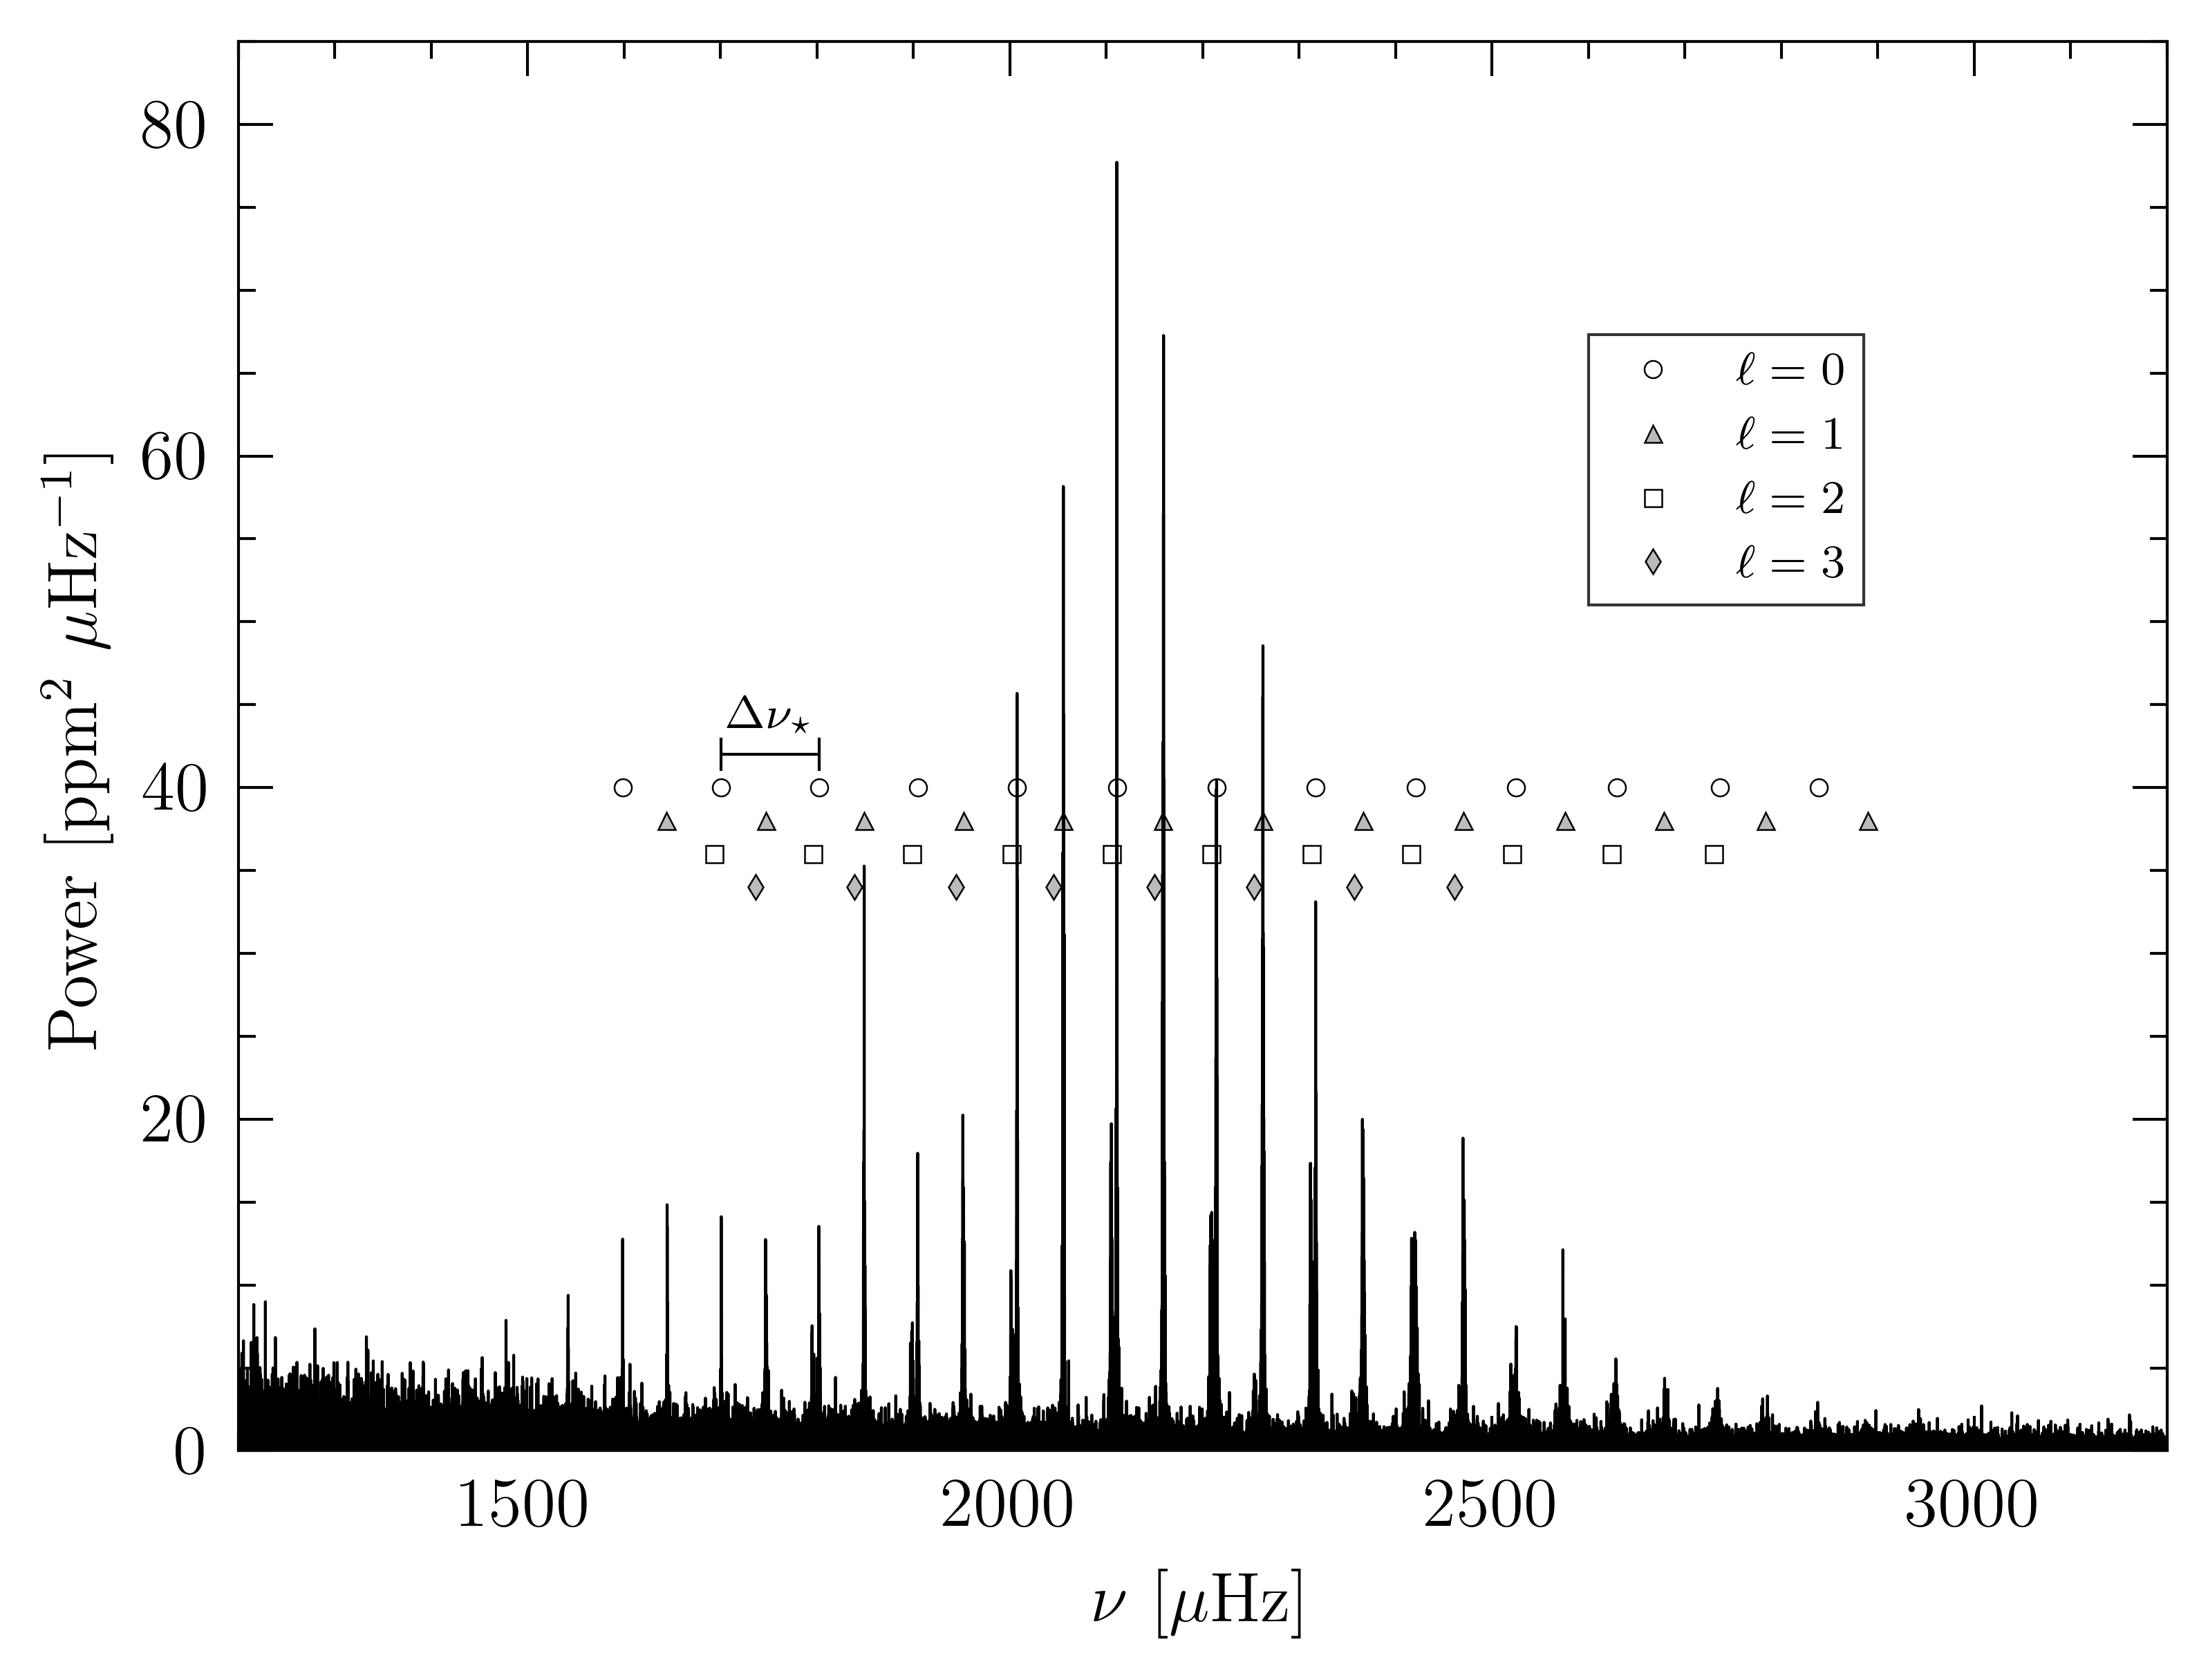

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

# do it

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(minFreq,maxFreq)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'$\nu$ [$\mu$Hz]',fontsize=axisFontSize)

ax.set_ylim(minPSD,maxPSD)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_ylabel(r'Power [ppm$^2$ $\mu$Hz$^{-1}$]',fontsize=axisFontSize)

ax.plot(nu,power,color='black',lw=0.5,zorder=10)

# plot the locations of the different ell modes

ax.plot(nul0,pl0,'o',ms=3,mew=0.3,mfc='white',mec='black',label=r'$\ell=0$',zorder=5)
ax.plot(nul1,pl1,'^',ms=3,mew=0.3,mfc='#bbbbbb',mec='black',label=r'$\ell=1$',zorder=5)
ax.plot(nul2,pl2,'s',ms=3,mew=0.3,mfc='white',mec='black',label=r'$\ell=2$',zorder=5)
ax.plot(nul3,pl3,'d',ms=3,mew=0.3,mfc='#bbbbbb',mec='black',label=r'$\ell=3$',zorder=5)

legend = ax.legend(fontsize=labelFontSize,fancybox=False,edgecolor='black',loc=(0.7,0.6))
legend.get_frame().set_linewidth(0.5)

ax.hlines(42.0,nul0[1],nul0[2],ls=['-'],lw=0.5,colors=['black'])
ax.vlines([nul0[1],nul0[2]],41,43,ls=['-'],lw=0.5,colors=['black'])

ax.text(0.5*(nul0[1]+nul0[2]),43.0,r'$\Delta\nu_{\star}$',va='bottom',ha='center',fontsize=labelFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')